**PROJECT:** "Fraud prevention and detection"

**GROUP N°:** 8 - *MAPA, Connecting Ideas*

**MEMBERS:** Mariana Uro - Pablo Tamayo

**OBJECTIVE:** The project’s objetive is predict frauds over distance of financial transactions​.

**DESCRIPTION OF THE VARIABLES:**

    distance_from_home: the distance from home to where the transaction took place
    distance_from_last_transaction: the distance from the last transaction 
    ratio_to_median_purchase_price: relationship between of the purchase Price and the average purchase price
    repeat_retailer: the transaction from the retailer.
    used_chip: is the transaction that was made using chip (credit card).
    used_pin_number: is the transaction that was made using PIN number.
    online_order: the transaction is an online order.
    fraud: ¿Is the transaction a fraud?

**SETUP DEL PROYECTO**

**IMPORTACIÓN DE LIBRERÍAS**

In [ ]:
# Numeric, scientific and data science libreries
#============================================================================================================
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sidetable

#Visualization
#============================================================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Sklearn imports
#============================================================================================================

# Data Preprocessing
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer

# Data preparation for training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Evaluation metrics and visualization
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Models from Sklearn and XGBOOST
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.neural_network
from sklearn. ensemble import StackingClassifier
from sklearn. ensemble import RandomForestClassifier
import xgboost as xgb

#Feature Importance
from sklearn.inspection import permutation_importance

**IMPORTACIÓN Y ANÁLISIS DEL DATASET**

In [ ]:
# Importamos el dataset
#============================================================================================================

df_fraude_creditcard = pd.read_csv('card_transdata.csv')
df_fraude_creditcard.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
# Calculamos el tamaño del dataset
#============================================================================================================

df_fraude_creditcard.shape

(1000000, 8)

In [ ]:
# Mostramos el nombre de las variables del dataset en forma de lista
#============================================================================================================

df_fraude_creditcard.columns.values.tolist()

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'repeat_retailer',
 'used_chip',
 'used_pin_number',
 'online_order',
 'fraud']

In [ ]:
# Calculamos la cantidad de datos por variable
#============================================================================================================

df_fraude_creditcard.count()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                   1000000
used_chip                         1000000
used_pin_number                   1000000
online_order                      1000000
fraud                             1000000
dtype: int64

<AxesSubplot:>

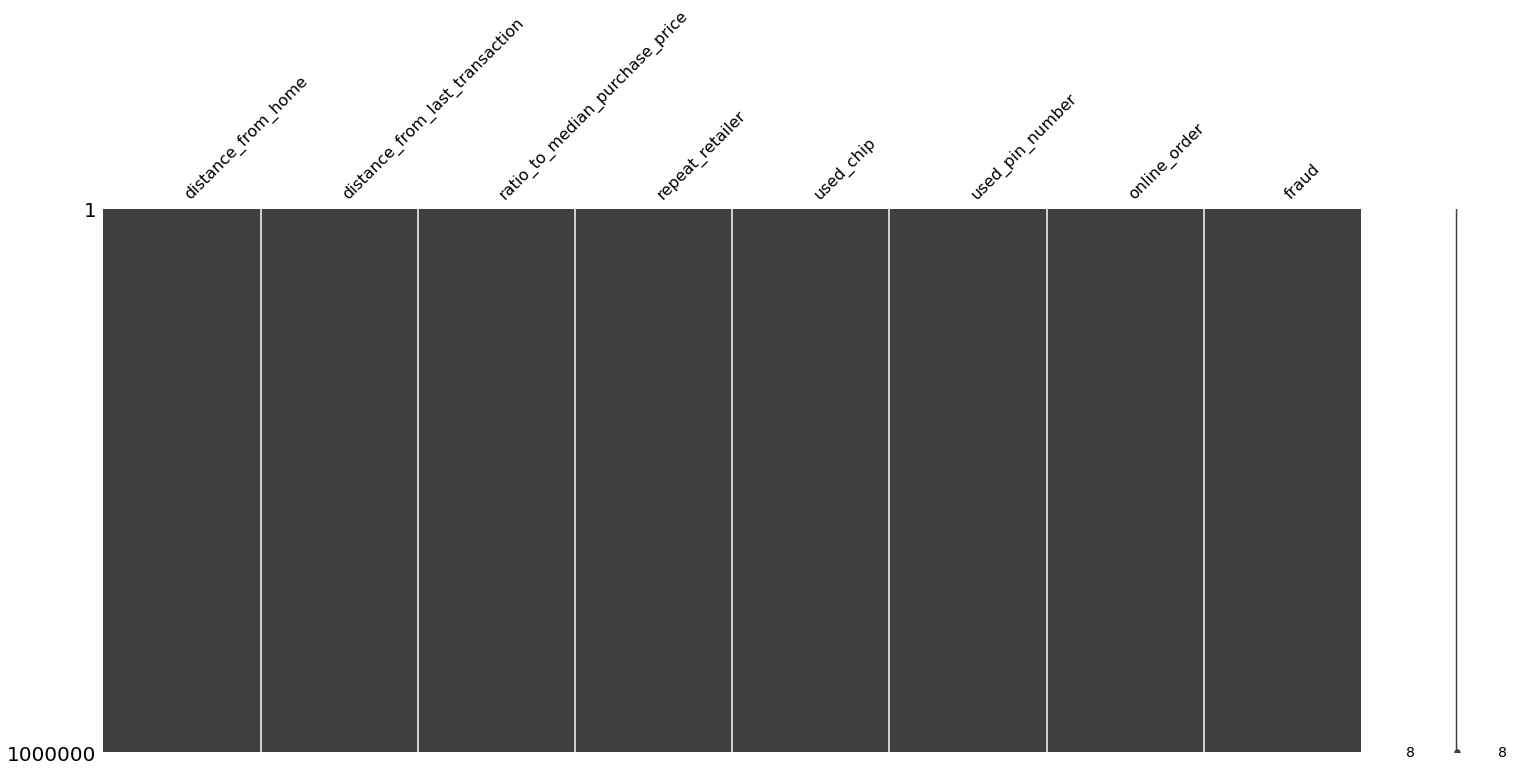

In [ ]:
# Verificamos la existencia de datos "Nan" gráficamente.
#============================================================================================================

msno.matrix(df_fraude_creditcard)

A partir de este gráfico, podemos vemos que el dataset no tiene valores Nan, ya que no hay espacios blancos. 

Tener en cuenta que:
    
    Blanco: sin valores o Nan
    Negro: con valores

In [ ]:
# Analizamos el tipo de dato
#============================================================================================================

df_fraude_creditcard.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [ ]:
# Analizamos los valores unicos de las variables que en principio parecen tener datos binarios
#============================================================================================================

df_fraude_creditcard['repeat_retailer'].unique()

array([1., 0.])

In [ ]:
df_fraude_creditcard['used_chip'].unique()

array([1., 0.])

In [ ]:
df_fraude_creditcard['used_pin_number'].unique()

array([0., 1.])

In [ ]:
df_fraude_creditcard['online_order'].unique()

array([0., 1.])

In [ ]:
df_fraude_creditcard['fraud'].unique()

array([0., 1.])

**Conclusión del análisis:** Tal como se puede ver en las variables analizadas, todas ellas tienen datos binarios. Podrían transformarse en variables categóricas, pero por ahora mantendremos su tipo para un mejor análisis.

In [ ]:
# Realizamos un análisis de las principales medidas estadísticas 
#============================================================================================================

df_fraude_creditcard.describe().round(2)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.0,1000000.00,1000000.00
mean,26.63,5.04,1.82,0.88,0.35,0.1,0.65,0.09
std,65.39,25.84,2.80,0.32,0.48,0.3,0.48,0.28
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,3.88,0.30,0.48,1.00,0.00,0.0,0.00,0.00
50%,9.97,1.00,1.00,1.00,0.00,0.0,1.00,0.00
75%,25.74,3.36,2.10,1.00,1.00,0.0,1.00,0.00
max,10632.72,11851.10,267.80,1.00,1.00,1.0,1.00,1.00


**Conclusión del análisis:** Se puede observar que en las 2 primeras variables, hay mucha distancia entre el mínimo y el máximo. En este sentido, la mediana o el 2° quartil están muy alejado del valor máximo, lo que en prinicpio nos que pueden existir muchos outsider.   

**ANÁLISIS UNIVARIADO**

***1°: Análisis de frecuencias de las variables binarias con el método Sidetable***

In [ ]:
# Realizamos un análisis de frecuencia de las variables con valores binarios
#============================================================================================================

df_fraude_creditcard.stb.freq(['repeat_retailer']).round(2)

,repeat_retailer,count,percent,cumulative_count,cumulative_percent
0,1.0,881536,88.15,881536,88.15
1,0.0,118464,11.85,1000000,100.00


In [ ]:
df_fraude_creditcard.stb.freq(['used_chip']).round(2)

,used_chip,count,percent,cumulative_count,cumulative_percent
0,0.0,649601,64.96,649601,64.96
1,1.0,350399,35.04,1000000,100.00


In [ ]:
df_fraude_creditcard.stb.freq(['used_pin_number']).round(2)

,used_pin_number,count,percent,cumulative_count,cumulative_percent
0,0.0,899392,89.94,899392,89.94
1,1.0,100608,10.06,1000000,100.00


In [ ]:
df_fraude_creditcard.stb.freq(['online_order']).round(2)

,online_order,count,percent,cumulative_count,cumulative_percent
0,1.0,650552,65.06,650552,65.06
1,0.0,349448,34.94,1000000,100.00


In [ ]:
df_fraude_creditcard.stb.freq(['fraud']).round(2)

,fraud,count,percent,cumulative_count,cumulative_percent
0,0.0,912597,91.26,912597,91.26
1,1.0,87403,8.74,1000000,100.00


**Conclusión del análisis:** Se puede ver que del total de transacciones solo el 35% se realizan con tarjetas de crédito. Por otra parte, solo el 10% lo usan introduciendo un código de seguridad. También es impornatet destacar que, el 65% son transacciones online. Finalmente, solo en el 9% de las transacciones se detectó fraude.

***2°: Análisis de la variable "distance_from_home" con un gráfico de caja***

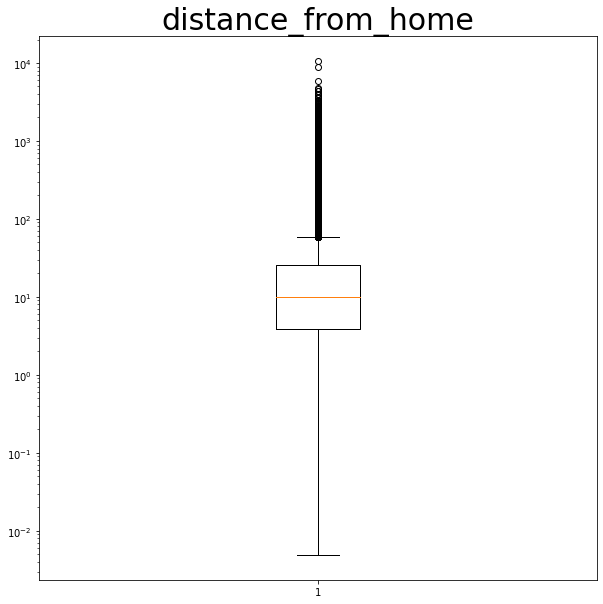

In [ ]:
# Realizamos un boxplot utilizando matplotlib. Para una mejor compresión de los datos se estableció una escala logarítmica
#=========================================================================================================================

plt.figure(figsize=(10,10))
plt.boxplot(df_fraude_creditcard["distance_from_home"])
plt.title("distance_from_home", fontsize=30)
plt.yscale("log")
plt.show()

***Conclusión del análisis:*** como se observa, existen muchos valores outsider, lo cual debemos prestar atención para que no afecten los resultados del modelo de ML.

***3°: Análisis de la variable "distance_from_home" con un histograma***

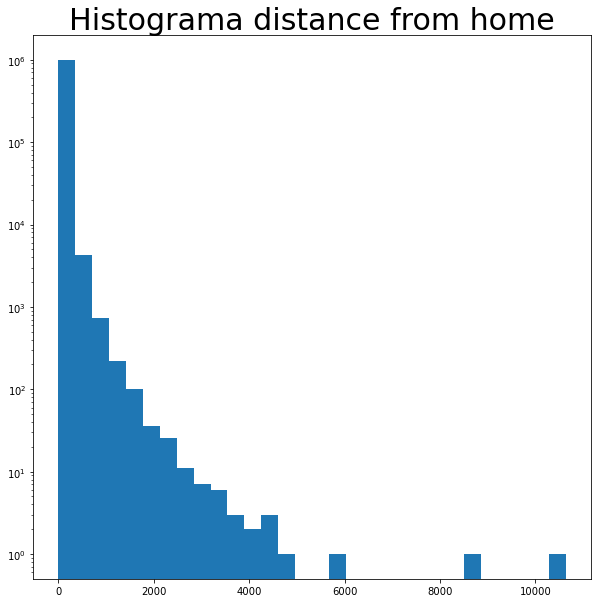

In [ ]:
# Realizamos un histograma utilizando matplotlib. Para una mejor compresión de los datos se estableció una escala logarítmica
#============================================================================================================================

plt.figure(figsize=(10,10))
plt.hist(df_fraude_creditcard["distance_from_home"], bins=30)
plt.title("Histograma distance from home", fontsize=30)
plt.yscale("log")
plt.show()

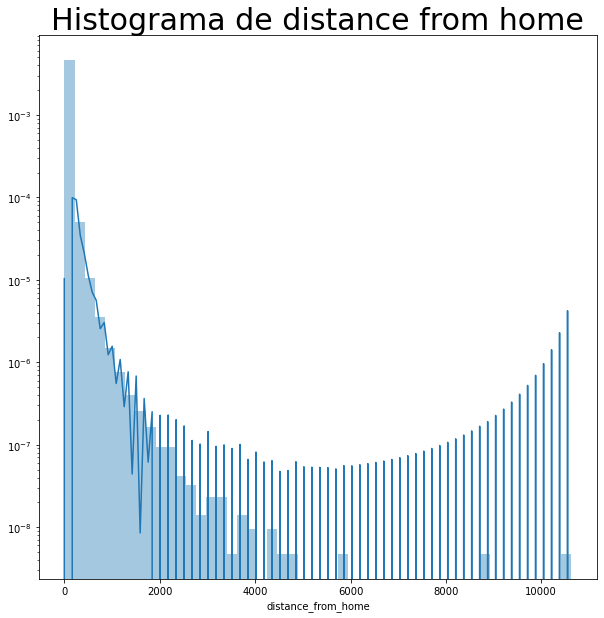

In [ ]:
# Realizamos un histograma utilizando seaborn. Para una mejor compresión de los datos se estableció una escala logarítmica
#=========================================================================================================================

plt.figure(figsize=(10,10))
sns.distplot(df_fraude_creditcard["distance_from_home"])
plt.title("Histograma de distance from home", fontsize=30)
plt.yscale("log")
plt.show()

**Conclusión del análisis:** como se observa, la variable analizada presenta una distribución asimétrica a la izquierda.

**ANÁLISIS BIVARIADO**

***1°: Definir un dataframe de correlaciones***

In [ ]:
# Definimos un dataframe que muestra las correlaciones a través del método "corr"
#============================================================================================================

df_corr = df_fraude_creditcard.corr()
df_corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


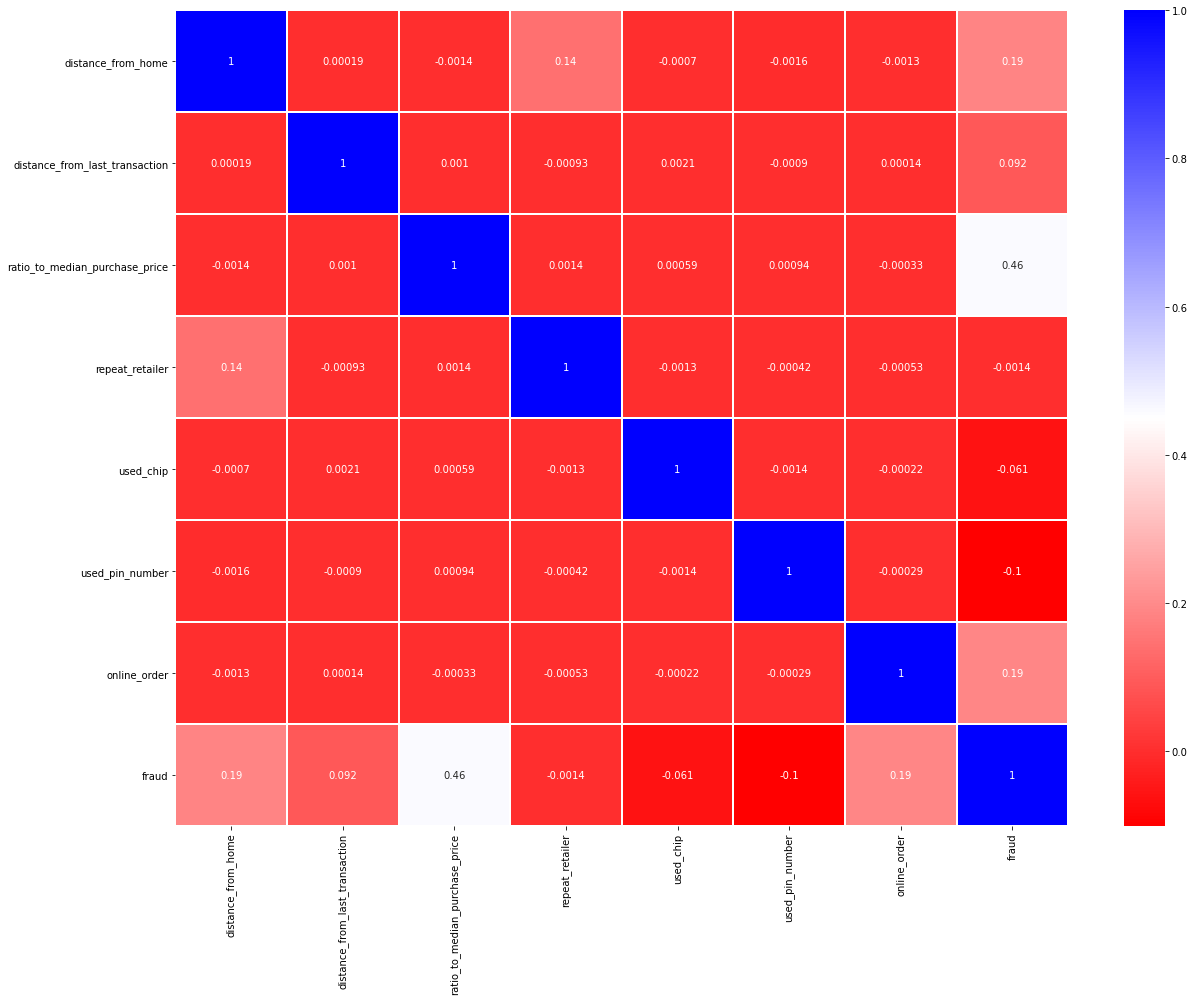

In [ ]:
# Realizamos un heatmap utilizando seaborn.
#=========================================================================================================================

plt.figure(figsize=(20,15))
cor = df_corr
sns.heatmap(cor, annot=True, cmap="bwr_r" , linewidths=.4)
plt.show()


**Conclusión del análisis:** De acuerdo al gráfico, se puede observar que hay una baja correlación o no existe correlación entre las variables.

In [ ]:
# Analizamos el sesgo de las variables.
#============================================================================================================

df_fraude_creditcard.skew()

distance_from_home                 20.239733
distance_from_last_transaction    125.921226
ratio_to_median_purchase_price      8.915015
repeat_retailer                    -2.361310
used_chip                           0.627134
used_pin_number                     2.655457
online_order                       -0.631517
fraud                               2.921824
dtype: float64

**Conclusión del análisis:** existen muchos sesgo en las variables. 

**ANÁLISIS MULTIVARIADO**

C:\Users\Pablo\miniconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


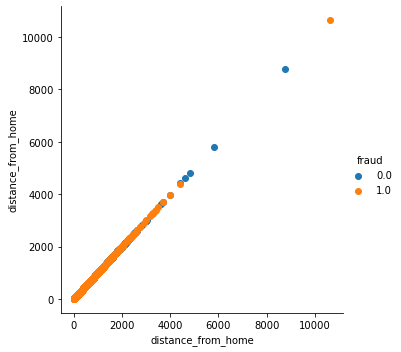

In [ ]:
# Realizamos un facegrid utilizando seaborn. 
#====================================================================================================================================

sns.FacetGrid(df_fraude_creditcard,hue = 'fraud' , size = 5).map(plt.scatter,'distance_from_home','distance_from_home').add_legend();
plt.show()

**Conclusión del análisis:** se puede observar, en principio, que la distancia de la casa donde se realizó una transacción, no tiene relación con el fraude.   

C:\Users\Pablo\miniconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


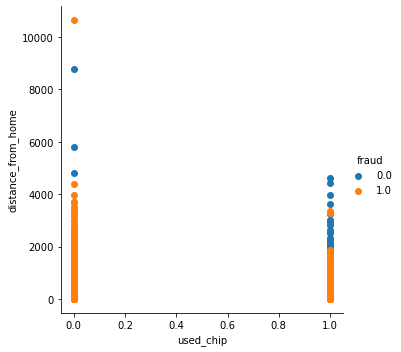

In [ ]:
# Realizamos un facegrid utilizando seaborn. 
#===========================================================================================================================

sns.FacetGrid(df_fraude_creditcard,hue = 'fraud' , size = 5).map(plt.scatter,'used_chip','distance_from_home').add_legend();
plt.show()

**Conclusión del análisis:** se puede observar que la mayor cantidad de fraude se comete en transacciones que no se realizan con chip.

**ALGORITMO DE CLASIFICACIÓN**

**Regresión Logística**

***1°: Working with variable X***

In [ ]:
# Define the X features dataframe
#=============================================================================================================================

X = df_fraude_creditcard.iloc[:, :-1].copy(deep=True)
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [ ]:
# Verify the symmetries
#=============================================================================================================================

X.skew()

distance_from_home                 20.239733
distance_from_last_transaction    125.921226
ratio_to_median_purchase_price      8.915015
repeat_retailer                    -2.361310
used_chip                           0.627134
used_pin_number                     2.655457
online_order                       -0.631517
dtype: float64

In [ ]:
#Initialize the transformers
#=============================================================================================================================

nrm_transformer = Normalizer()
pow_transformer = PowerTransformer()

In [ ]:
#Initialize the instances for the transformations: because of having the information to biased, we did 3 concatenated transformations.
#=============================================================================================================================

X = quantile_transform(X)
X = nrm_transformer.fit_transform(X)
X = pow_transformer.fit_transform(X)

In [ ]:
# Final X Dataframe
#=============================================================================================================================

X = pd.DataFrame(X)
X.head(10)

,0,1,2,3,4,5,6
0,1.235628,-0.895076,0.610596,-0.057858,1.374619,-0.334458,-1.288911
1,0.772181,-0.960578,0.949577,1.769323,-0.733769,-0.334458,-1.288911
2,-0.500739,0.061775,-0.881702,0.696206,-0.733769,-0.334458,1.068208
3,-1.370221,0.790197,-1.227377,-0.213634,1.346597,-0.334458,0.476343
4,0.750063,-0.646694,0.442875,-0.457736,1.293186,-0.334458,0.297717
5,-0.268246,1.862269,-1.858397,1.183174,-0.733769,-0.334458,-1.288911
6,-0.811831,0.216542,-1.303134,0.737493,-0.733769,-0.334458,1.092880
7,-0.593225,-0.721562,0.486179,0.543904,-0.733769,2.990136,-1.288911
8,-1.579682,2.170239,1.956139,-1.998180,-0.733769,-0.334458,-1.288911
9,-0.185471,0.622665,0.779366,-0.040434,-0.733769,-0.334458,0.597206


In [ ]:
# Verify the symmetries again
#=============================================================================================================================

X.skew()

0   -0.026013
1    0.004327
2    0.004550
3    0.046423
4    0.632974
5    2.655457
6   -0.223229
dtype: float64

**Conclusion**: although we did the data transformation, the "used_pin_number" variable continuos biased.

***2°: Working with variable "target"***

In [ ]:
# Define the target variable
#=============================================================================================================================

y = df_fraude_creditcard["fraud"].copy(deep=True)
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

***3°: Separate train and test with the "train test split" method***

In [ ]:
# Select the percentage of the test and train: 30% for test and 70% for train.
#=============================================================================================================================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

***4°: Initialize the models***

In [ ]:
# Initialize the models
#=============================================================================================================================

knn = KNeighborsClassifier()
lgr = LogisticRegression()
rfc = RandomForestClassifier()

**KNN Model**

In [ ]:
# Train KNN
#=============================================================================================================================

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Prediction with KNN
#=============================================================================================================================

knn.predict(X_test)

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
y_test

987231    0.0
79954     0.0
567130    0.0
500891    0.0
55399     0.0
         ... 
463299    0.0
728324    0.0
76260     0.0
77813     0.0
718205    1.0
Name: fraud, Length: 300000, dtype: float64

In [ ]:
# Precision metric - KNN Model
#=============================================================================================================================

print(f"Precision Score of the classifier is: {precision_score(y_test, knn.predict(X_test))}")

Precision Score of the classifier is: 0.9514662872500198


In [ ]:
# Recall metric - KNN Model
#=============================================================================================================================

print(f"Recall Score of the classifier is: {recall_score(y_test, knn.predict(X_test))}")

Recall Score of the classifier is: 0.9213517547552528


[[272643   1228]
 [  2055  24074]]


C:\Users\Pablo\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


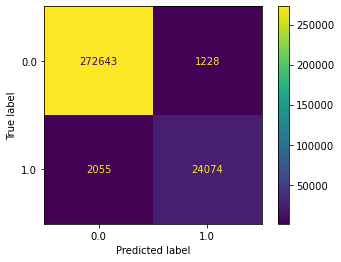

In [ ]:
# Confusion matrix - KNN Model
#=============================================================================================================================

print(confusion_matrix(y_test, knn.predict(X_test)))

# Plot the Matrix
#=============================================================================================================================

plot_confusion_matrix(knn, X_test, y_test)
plt.show()

**Logistic Regression Model**

In [ ]:
# Train Logistic Regression
#=============================================================================================================================

lgr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediction with Logistic Regression
#=============================================================================================================================

lgr.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_test

987231    0.0
79954     0.0
567130    0.0
500891    0.0
55399     0.0
         ... 
463299    0.0
728324    0.0
76260     0.0
77813     0.0
718205    1.0
Name: fraud, Length: 300000, dtype: float64

In [ ]:
# Precision metric - LR Model
#=============================================================================================================================

print(f"Precision Score of the classifier is: {precision_score(y_test, lgr.predict(X_test))}")

Precision Score of the classifier is: 0.7125389594821385


In [ ]:
# Recall metric - LR Model
#=============================================================================================================================

print(f"Recall Score of the classifier is: {recall_score(y_test, lgr.predict(X_test))}")

Recall Score of the classifier is: 0.11374335030043246


[[272672   1199]
 [ 23157   2972]]


C:\Users\Pablo\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


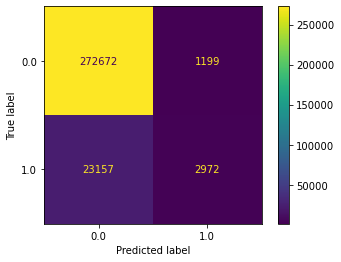

In [ ]:
# Confusion matrix - RL Model
#=============================================================================================================================

print(confusion_matrix(y_test, lgr.predict(X_test)))

# Plot the Matrix
#=============================================================================================================================

plot_confusion_matrix(lgr, X_test, y_test)
plt.show()

**Random Forest Model**

In [ ]:
# Train Random Forest
#=============================================================================================================================

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Prediction with Random Forest Model
#=============================================================================================================================

rfc.predict(X_test)

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
y_test

987231    0.0
79954     0.0
567130    0.0
500891    0.0
55399     0.0
         ... 
463299    0.0
728324    0.0
76260     0.0
77813     0.0
718205    1.0
Name: fraud, Length: 300000, dtype: float64

In [ ]:
# Precision metric - Random Forest Model
#=============================================================================================================================

print(f"Precision Score of the classifier is: {precision_score(y_test, rfc.predict(X_test))}")

Precision Score of the classifier is: 0.9838596216976708


In [ ]:
# Recall metric - Random Forest Model
#=============================================================================================================================

print(f"Recall Score of the classifier is: {recall_score(y_test, rfc.predict(X_test))}")

Recall Score of the classifier is: 0.9634888438133874


[[273458    413]
 [   954  25175]]


C:\Users\Pablo\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


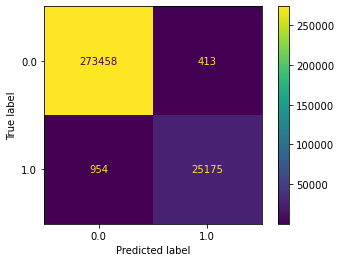

In [ ]:
# Confusion matrix - Random Forest Model
#=============================================================================================================================

print(confusion_matrix(y_test, rfc.predict(X_test)))

# Plot the Matrix
#=============================================================================================================================

plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

**Evaluate all models** 

In [ ]:
# Make an Array with the metrics score 
#=============================================================================================================================

score = np.array([[precision_score(y_test, knn.predict(X_test)),precision_score(y_test, lgr.predict(X_test)),precision_score(y_test, rfc.predict(X_test))],
                  [recall_score(y_test, knn.predict(X_test)),recall_score(y_test, lgr.predict(X_test)),recall_score(y_test, rfc.predict(X_test))]])
score

array([[0.95146629, 0.71253896, 0.98385962],
       [0.92135175, 0.11374335, 0.96348884]])

In [ ]:
# Create a Dataframe with the Array of before step  
#=============================================================================================================================

df_score_models = pd.DataFrame(score,
                               index=["Precision","Recall"],
                               columns=["KNN","Regresion Logistc","Random Forest"]
)
df_score_models

,KNN,Regresion Logistc,Random Forest
Precision,0.951466,0.712539,0.983860
Recall,0.921352,0.113743,0.963489


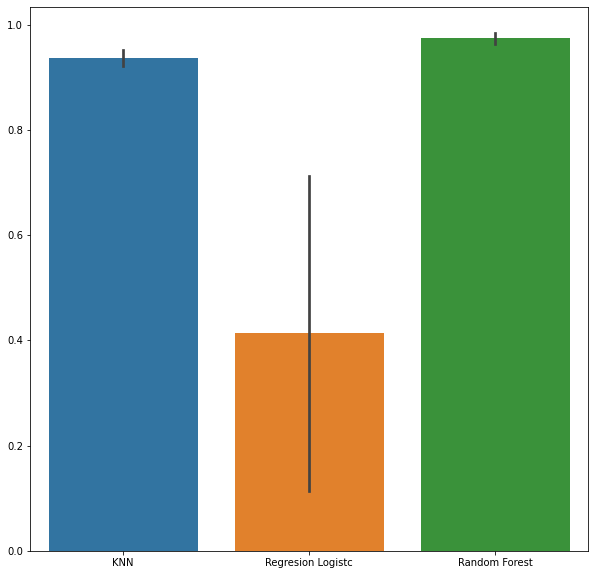

In [ ]:
# Make a Barplot 
#=============================================================================================================================

plt.figure(figsize=(10,10))
sns.barplot(data=df_score_models)
plt.show()

**Conclusion:** To evaluate the models used, we have selected the Recall and Precision metrics. We discard Acurancy, because this metric only works when the labels to be predicted are balanced, which is not our case with our metrics.
Although the precision metrics gave a higher score in the three evaluated models, in case of fraud analysis is relevant to avoid false negatives. For this reason, we selected the Metric Recall Score.
The Random Forest  Model has the best score and the training time is optimal.